In [40]:
import os
import tensorflow as tf
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.layers import Dense, Merge
from keras.layers import Input, concatenate, Concatenate
from keras.optimizers import Adadelta
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from skimage.io import imread
from keras.models import load_model
from keras.callbacks import EarlyStopping

## 1. Read images

In [41]:
TRAIN_IMG_PATH = "./data/mri/"
TRAIN_LBL_PATH = "./data/labels/"

TEST_IMG_PATH = 'banco_dados_SB/test/imagens/'
TEST_LBL_PATH = 'banco_dados_SB/test/classes/'

In [42]:
X_train = [imread(fname=TRAIN_IMG_PATH + img, as_grey=True) for img in os.listdir(TRAIN_IMG_PATH)]
y_train = [imread(fname=TRAIN_LBL_PATH + lbl)[:, :] for lbl in os.listdir(TRAIN_LBL_PATH)]

### Criando um validation set

In [43]:
X_train = np.asarray(X_train)/255
y_train = np.asarray(y_train)/255

In [44]:
print(X_train.shape)
print(y_train.shape)
# testando o minimo
y_train_vec = np.reshape(y_train,[260,-1])
print(max(y_train_vec[0,:]))

(260, 256, 256)
(260, 256, 256)
1.0


In [45]:
bounds = int(len(X_train)-(np.floor(338*.1)))
print (bounds)
X_test = X_train[bounds:,:,:]
y_test = y_train[bounds:,:,:]
X_train = X_train[:bounds,:,:]
y_train = y_train[:bounds,:,:]
print(X_test.shape,y_test.shape )
print(X_train.shape,y_train.shape )

227
(33, 256, 256) (33, 256, 256)
(227, 256, 256) (227, 256, 256)


### Testing data set

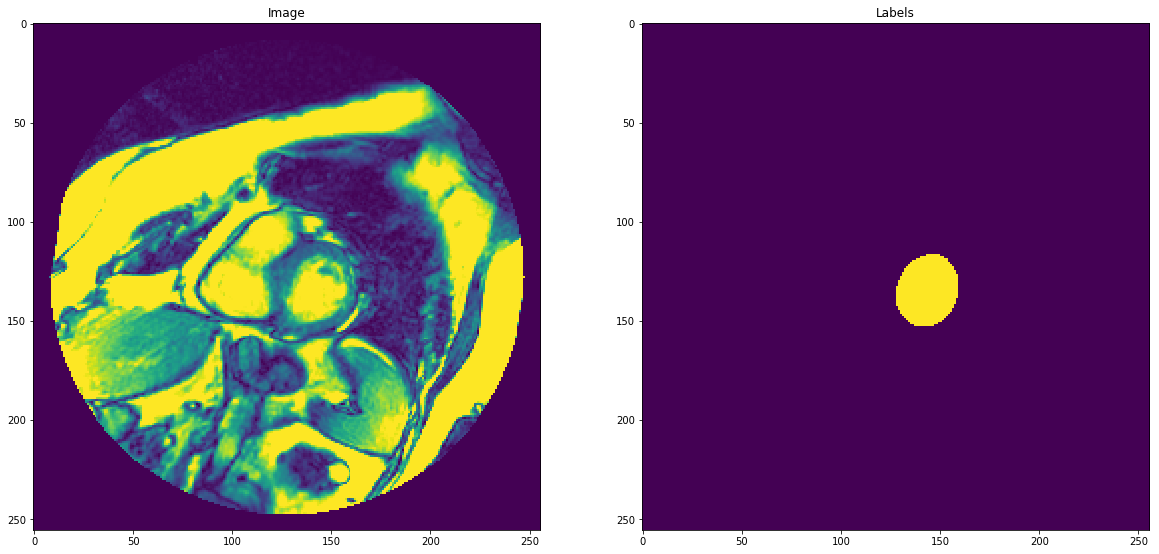

In [46]:
idx = 15

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(X_train[idx])
ax[0].set_title('Image')

ax[1].imshow(y_train[idx])
ax[1].set_title('Labels')

plt.show()

### função inicializador bilinear

In [47]:
def bilinear_init(filter_size,num_channels):
    #Create bilinear weights in numpy array
    bilinear_kernel = np.zeros([filter_size, filter_size], dtype=np.float32)
    scale_factor = (filter_size + 1) // 2
    if filter_size % 2 == 1:
        center = scale_factor - 1
    else:
        center = scale_factor - 0.5
    for x in range(filter_size):
        for y in range(filter_size):
            bilinear_kernel[x,y] = (1 - abs(x - center) / scale_factor) * \
                                   (1 - abs(y - center) / scale_factor)
    weights = np.zeros((filter_size, filter_size, num_channels, num_channels))
    for i in range(num_channels):
        weights[:, :, i, i] = bilinear_kernel
        return weights

In [48]:
W_bilinear = bilinear_init (8,1)

## 2. Create CNN model

In [49]:
n = Concatenate()[x,y]

NameError: name 'x' is not defined

In [53]:
input_shape = (X_train[0].shape[0], X_train[0].shape[1], 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_normal',padding='same',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool3'))
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv4'))
model.add(Dropout(0.5,name='drop4'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1024, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(1024, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv5'))
model.add(Dropout(0.5,name='drop5'))
model.add(UpSampling2D(size=(2, 2),name='up6'))
model.add(concatenate([drop5, up6],axis=3))
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer= 'he_normal', padding='same'),'conv6')
model.add(UpSampling2D(2,2),name='up7')
model.add(concatenate[pool3,up7],axis=3)
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv7'))
model.add(UpSampling2D(2,2),name='up8')
model.add(concatenate[pool2,up8],axis=3)
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_initializer= 'he_normal', padding='same',name='conv8'))
model.add(UpSampling2D(2,2),name='up9')
model.add(concatenate[pool1,up9],axis=3)
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_normal',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_normal',padding='same'))
model.add(Conv2D(2, (3, 3), activation='sigmoid', kernel_initializer= 'he_normal',padding='same',name='conv9'))
model.add(Activation(activation='softmax'))


NameError: name 'drop5' is not defined

In [10]:
print (input_shape, X_train.shape)
model.summary()

NameError: name 'input_shape' is not defined

In [98]:
model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

## 3. Prepare data

In [99]:
# Reshape input images to fit TensorFlow shape pattern
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#### One-Hot-Encoded para imagens label treinamento

In [100]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# criando vetor unitario para validação
y_train_vec = np.reshape (y_train,[-1])
print (y_train_vec.shape)
print ("min y_train: ",min(y_train_vec))
print ("max y_train: ",max(y_train_vec))
# fazendo o one-hot-encoded
y_train_ohe = encoder.fit_transform(y_train.reshape(-1,1))
y_train_ohe = y_train_ohe.toarray()
y_train_ohe=np.reshape(y_train_ohe,[227,256,256,2])

(14876672,)
min y_train:  0.0
max y_train:  1.0


#### One-Hot-Encoded para imagens label de teste

In [101]:
y_teste_vec = np.reshape (y_test,[-1])
print (y_teste_vec.shape)
print ("min y_train: ",min(y_teste_vec))
print ("max y_train: ",max(y_teste_vec))
y_teste_ohe = encoder.fit_transform(y_test.reshape(-1,1))
y_teste_ohe = y_teste_ohe.toarray()
y_teste_ohe=np.reshape(y_teste_ohe,[33,256,256,2])

(2162688,)
min y_train:  0.0
max y_train:  1.0


## 4. Train model

In [102]:
from keras.models import load_model
savings = "./savings"
if os.path.isdir(savings):
    path_sav = 'savings/'
    model = load_model(path_sav +'Lis_net.h5')

In [103]:
batch_size = 16
epochs = 150
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True,batch_size=batch_size)

# Monitorando se a função não esta aprendendo mais...
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train_ohe,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_teste_ohe),
          callbacks=[tbCallBack,early_stopping])

Train on 227 samples, validate on 33 samples
Epoch 1/150
227/227 [==============================] - 393s - loss: 0.6902 - acc: 0.9476 - val_loss: 0.6866 - val_acc: 0.9823
Epoch 2/150
227/227 [==============================] - 391s - loss: 0.6833 - acc: 0.9837 - val_loss: 0.6798 - val_acc: 0.9823
Epoch 3/150
227/227 [==============================] - 391s - loss: 0.6763 - acc: 0.9837 - val_loss: 0.6726 - val_acc: 0.9823
Epoch 4/150
227/227 [==============================] - 391s - loss: 0.6692 - acc: 0.9829 - val_loss: 0.6648 - val_acc: 0.9611
Epoch 5/150
227/227 [==============================] - 390s - loss: 0.6343 - acc: 0.9158 - val_loss: 0.5651 - val_acc: 0.8919
Epoch 6/150
227/227 [==============================] - 391s - loss: 0.3512 - acc: 0.9184 - val_loss: 0.1664 - val_acc: 0.9522
Epoch 7/150
227/227 [==============================] - 390s - loss: 0.1246 - acc: 0.9816 - val_loss: 0.1354 - val_acc: 0.9823
Epoch 8/150
227/227 [==============================] - 391s - loss: 0.090

227/227 [==============================] - 387s - loss: 0.0114 - acc: 0.9962 - val_loss: 0.0125 - val_acc: 0.9959
Epoch 130/150
227/227 [==============================] - 387s - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0130 - val_acc: 0.9956
Epoch 131/150
227/227 [==============================] - 388s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0127 - val_acc: 0.9957
Epoch 132/150
227/227 [==============================] - 387s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0123 - val_acc: 0.9959
Epoch 133/150
227/227 [==============================] - 387s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0123 - val_acc: 0.9959
Epoch 134/150
227/227 [==============================] - 387s - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0127 - val_acc: 0.9957
Epoch 135/150
227/227 [==============================] - 387s - loss: 0.0111 - acc: 0.9963 - val_loss: 0.0124 - val_acc: 0.9958
Epoch 136/150
227/227 [==============================] - 387s - loss: 0.0112 - acc: 0.9962 - val_loss: 0.0139 - val_ac

In [104]:
if not os.path.isdir(savings):
    path_sav = 'savings/'
    os.makedirs(path_sav)
model.save(path_sav +'Lis_net.h5')

In [105]:
P_fig = model.predict(X_test, batch_size=batch_size, verbose=1)

33/33 [==============================] - 17s    


In [131]:
ch0_arr = np.asarray (P_fig[:,:,:,0])
ch1_arr = np.asarray (P_fig[:,:,:,1])
ch_shape = ch0_arr.shape
print(ch_shape)

(33, 256, 256)


In [132]:
ch0_arr = np.reshape(ch0_arr,[ch_shape[0]*ch_shape[1]*ch_shape[2]])
ch1_arr = np.reshape(ch1_arr,[ch_shape[0]*ch_shape[1]*ch_shape[2]])

In [133]:
im_final = np.zeros(ch0_arr.shape)
for ii in np.arange(len(ch0_arr)):
    if ch0_arr[ii]>ch1_arr[ii] :
        im_final[ii] = 0
    else:
        im_final[ii] = 1
im_final = np.reshape(im_final,ch_shape)

IndexError: too many indices for array

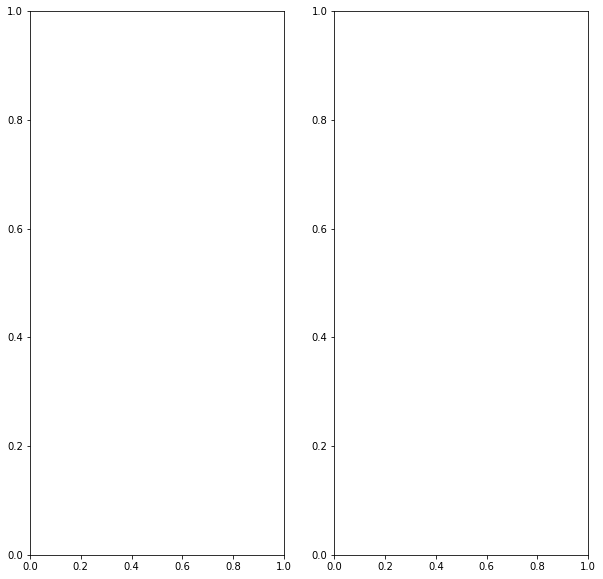

In [134]:
idx = 6


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(X_test[idx,:,:,0])
ax[0].set_title('Imagem teste')

ax[1].imshow(im_final[idx,:,:])
ax[1].set_title('Imagem final')

In [ ]:
sess = tf.Session()
writer = tf.summary.FileWriter("Graph")
writer.add_graph (sess.graph)
sess.close()